In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

import warnings
warnings.filterwarnings('ignore')

import os
print(os.listdir("/content/drive/MyDrive/Face_Detection_Dataset/Testing"))

['testing_real', 'testing_fake']


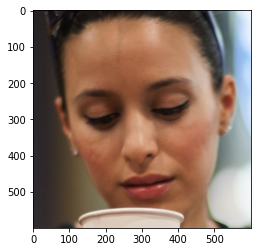

In [3]:
import os 
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
flat_data = []
Dataset = '/content/drive/MyDrive/Face_Detection_Dataset/Training'
Categories = ['training_fake','training_real']

for categories in Categories:
  class_num = Categories.index(categories)
  path = os.path.join(Dataset,categories)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    #print(img_array.shape)
    plt.imshow(img_array,cmap='gray')
    img_resized = resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)
flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

<BarContainer object of 2 artists>

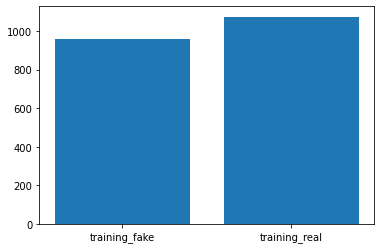

In [4]:
unique,count = np.unique(target,return_counts=True)
plt.bar(Categories,count)

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=109)

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators = 400, random_state = 1)
rf.fit(x_train, y_train)
RF_accuracy = round(rf.score(x_test, y_test)*100,2)

print("RF_accuracy is %", RF_accuracy)


RF_accuracy is % 62.85


In [7]:
y_pred = rf.predict(x_test)

In [8]:
from sklearn.ensemble import AdaBoostClassifier


# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=0)

# Train Adaboost Classifer
model1 = abc.fit(x_train, y_train)


#Predict the response for test dataset
y_pred = model1.predict(x_test)

In [9]:
#import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score


# calculate and print model accuracy
print("AdaBoost Classifier Model Accuracy:", accuracy_score(y_test, y_pred))

AdaBoost Classifier Model Accuracy: 0.5859247135842881


In [10]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.58      0.53      0.55       294
           1       0.59      0.64      0.61       317

    accuracy                           0.59       611
   macro avg       0.58      0.58      0.58       611
weighted avg       0.59      0.59      0.58       611



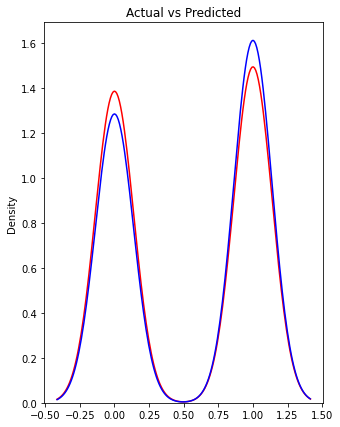

In [11]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)
plt.title('Actual vs Predicted') 


plt.show()
plt.close()

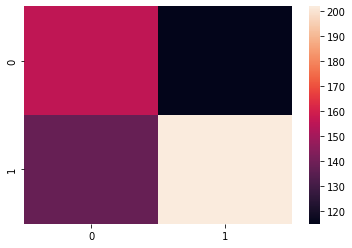

In [12]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_pred, y_test)


# Visualize it as a heatmap
import seaborn
seaborn.heatmap(CM)
plt.show()